In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [110]:
def Softmax(k, steps, runs, true_values, temp):
    
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    opt_arm = np.argmax(true_values, axis=1)
    for i in range(runs):
        
        exp_val = np.zeros([k,2])
        
        for j in range(steps):
            softmax = (np.exp(exp_val[:,0]/temp))/np.sum(np.exp(exp_val[:,0]/temp)) # gets softmax probabilities of all arms
            sf_arm = np.random.choice(range(k), 1, p = softmax ) # picks one arm based on probabilities
            sf_arm = np.squeeze(sf_arm)

            reward = np.random.normal(true_values[i][sf_arm],1)
           
            exp_val[sf_arm][1] += 1
            exp_val[sf_arm][0] = ((exp_val[sf_arm][0])*(exp_val[sf_arm][1]-1) + reward)/exp_val[sf_arm][1] # average of the values of arm
        
            avg[j]+=reward
#             if j%50==0:
#                 print(reward)
            
            if sf_arm == opt_arm[i]:
                opt[j]+=1
            
            
    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
    
    return avg, opt

In [111]:
def plot_fig(avg, opt):
    
    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg)])
    for i in range(1,steps+1):
        x[i-1] = i

    fig1.plot(x, avg, 'r')

    fig2.plot(x, opt, 'b')

    fig1.title.set_text('Softmax : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('softmax : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()

/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.
No handles with labels found to put in legend.


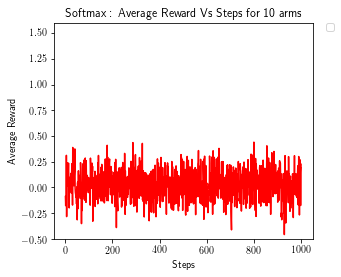

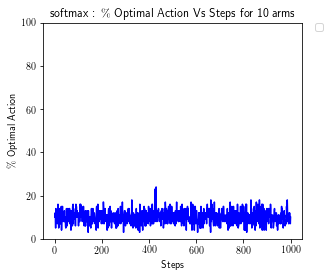

In [112]:
if __name__ == '__main__':
    steps = 1000
    runs = 100
    k = 10
    mean = 0
    std_dev = 1
    
    true_values = np.random.normal(mean, std_dev, (runs, k))
    temparatures = [0.01, 0.1, 1, 10]
    
    avg, opt = Softmax(k, steps, runs, true_values, temparatures[1])
    plot_fig(avg, opt)
    
    
#     colors = ['g', 'r', 'b', 'k', 'y','m', 'c']

#     for i in range(len(temparatures)):
#         avg, opt = Softmax(k, steps, runs, true_values, temparatures[i])
        

In [22]:
n = np.array([[10,1],[4,5],[6,7]])
print(n.shape)
temp =1
softmax = (np.exp(n[:,0]/temp))/np.sum(np.exp(n[:,0]/temp)) # gets softmax probabilities of all arms
softmax
n[2][1]+=1

(3, 2)


In [94]:
x = np.zeros([10,2])
temp = 1
softmax = (np.exp(x[:,0]/temp))/np.sum(np.exp(x[:,0]/temp)) # gets softmax probabilities of all arms
sf_arm = np.random.choice(range(10), 1, p = softmax ) # picks one arm based on probabilities
sf_arm = np.squeeze(sf_arm)
print(sf_arm)
# print(x[s])
print( x[sf_arm][1])
# a = x[:,0]
# print(x[0])

4
0.0


In [105]:
temparatures = [0.01, 0.1, 1, 10]
temp = temparatures[1]
softmax = (np.exp(x[:,0]/temp))/np.sum(np.exp(x[:,0]/temp)) # gets softmax probabilities of all arms
